In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv')
y = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv')

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# The output is a NumPy array. Convert it back to a DataFrame if you want to keep the DataFrame structure
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
X_train_rf.head()

0      1         2      3      4      5      6         7         8  \
7053  0.072  0.072  0.071713  0.068  0.072  0.076  0.076  0.075697  0.075697   
3506  0.784  0.436  0.458167  0.716  0.836  0.900  0.852  0.820717  0.645418   
7371  0.212  0.196  0.211155  0.200  0.224  0.256  0.232  0.207171  0.211155   
4515  0.060  0.060  0.067729  0.056  0.052  0.044  0.044  0.047809  0.047809   
8942  1.000  1.000  1.000000  1.000  1.000  1.000  1.000  1.000000  1.000000   

             9  ...      2294      2295      2296   2297      2298      2299  \
7053  0.079681  ...  0.195219  0.139442  0.087649  0.076  0.075697  0.071713   
3506  0.693227  ...  0.808765  0.780876  0.912351  0.924  0.880478  0.844622   
7371  0.227092  ...  0.290837  0.258964  0.231076  0.204  0.211155  0.199203   
4515  0.047809  ...  0.047809  0.051793  0.055777  0.048  0.055777  0.059761   
8942  1.000000  ...  1.000000  1.000000  1.000000  1.000  1.000000  1.000000   

          2300   2301      2302      2303  
7053  0.071713  0.068  0.067729  0.067729  
3506  0.812749  0.788  0.784861  0.717131  
7371  0.179283  0.176  0.183267  0.191235  
4515  0.059761  0.056  0.047809  0.043825  
8942  1.000000  1.000  1.000000  1.000000  

[5 rows x 2304 columns]

### Silhouette Method Graph
The silhouette method graph presents the silhouette score for different numbers of clusters. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better defined clusters.

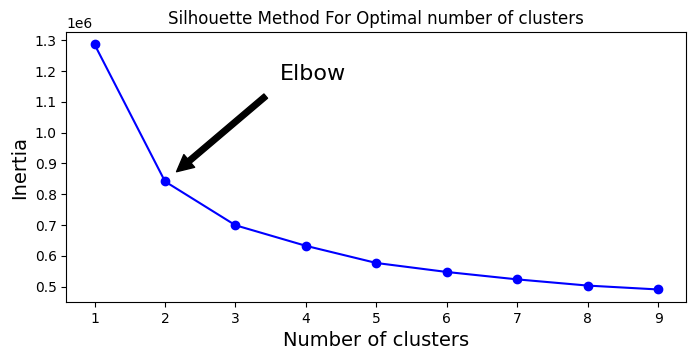

In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_rf)
                for k in range(1, 10)]
                
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.35, 0.8),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Silhouette Method For Optimal number of clusters')
plt.show()

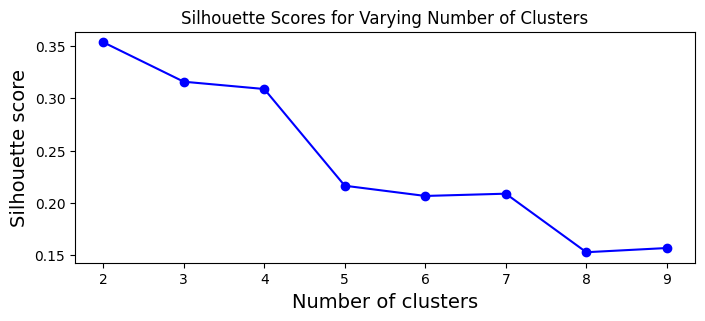

In [10]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for each k (excluding k = 1)
silhouette_scores = [silhouette_score(X_train_rf, model.labels_)
                              for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Scores for Varying Number of Clusters')
plt.show()

The silhouette score is highest for two clusters, indicating the best cohesion and separation at this point.

### Davies-Bouldin Index Graph
The Davies-Bouldin index is a metric for evaluating clustering algorithms. A lower Davies-Bouldin index score indicates a better clustering configuration, where the clusters are well separated and compact.

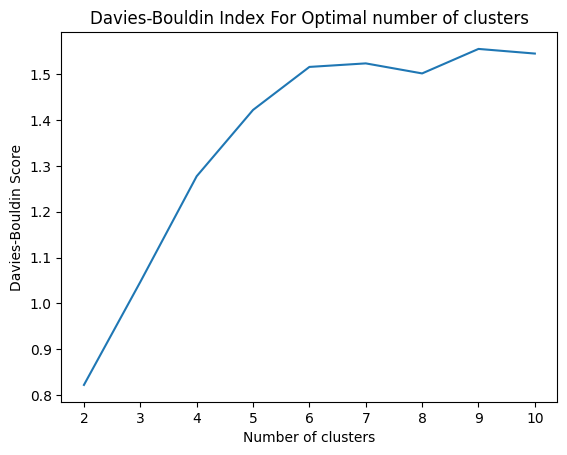

In [9]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_train_rf)
    db_scores.append(davies_bouldin_score(X_train_rf, cluster_labels))

# Plot the Davies-Bouldin scores
plt.plot(range_n_clusters, db_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index For Optimal number of clusters')
plt.show()

The Davies-Bouldin score is lowest for two clusters, which indicates the best cluster separation and compactness.

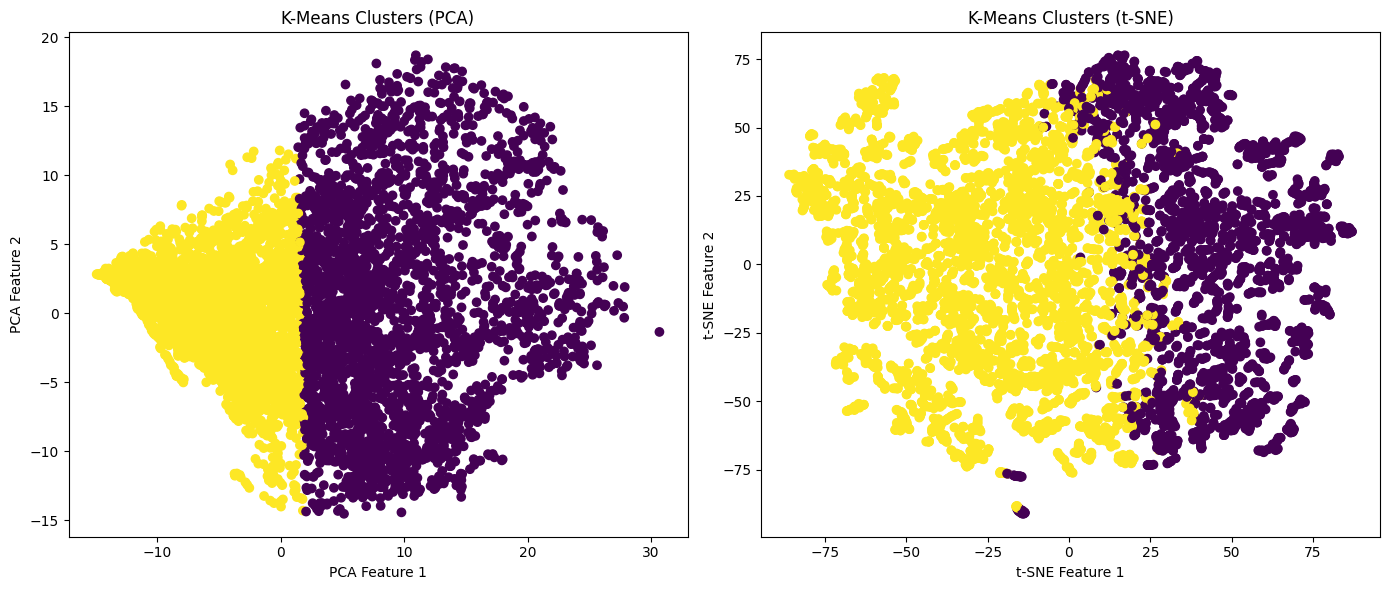

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_rf)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_rf)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_rf)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot PCA clusters
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].set_xlabel('PCA Feature 1')
axs[0].set_ylabel('PCA Feature 2')

# Plot t-SNE clusters
axs[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans.labels_)
axs[1].set_title('K-Means Clusters (t-SNE)')
axs[1].set_xlabel('t-SNE Feature 1')
axs[1].set_ylabel('t-SNE Feature 2')

# Display the plots
plt.tight_layout()  # Adjust the subplots to fit into the figure area.
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.35360167906159395
For n_clusters = 3, the average silhouette_score is : 0.31604163801117313
For n_clusters = 4, the average silhouette_score is : 0.3091031229609648
For n_clusters = 5, the average silhouette_score is : 0.21642054374118402
For n_clusters = 6, the average silhouette_score is : 0.20700770610601163
For n_clusters = 7, the average silhouette_score is : 0.2088303761863289
For n_clusters = 8, the average silhouette_score is : 0.15269165066648177
For n_clusters = 9, the average silhouette_score is : 0.14253531063991237
For n_clusters = 10, the average silhouette_score is : 0.14413643258212636


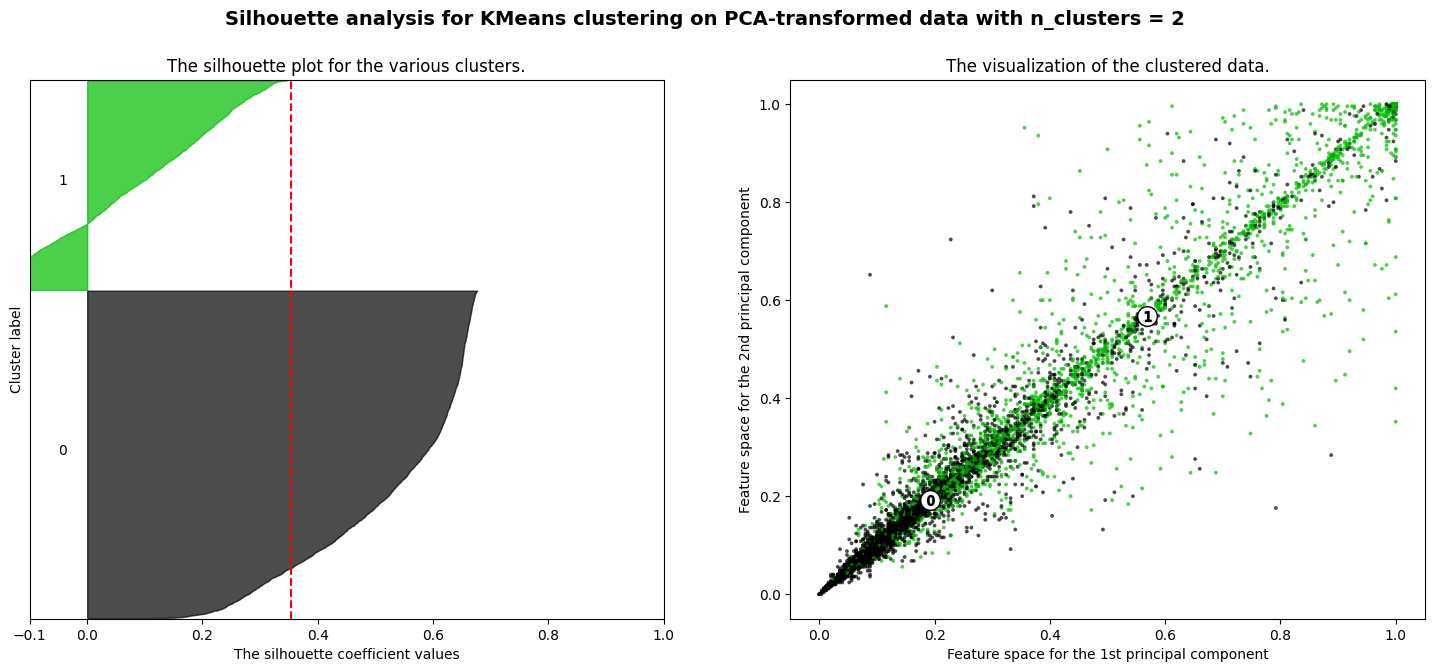

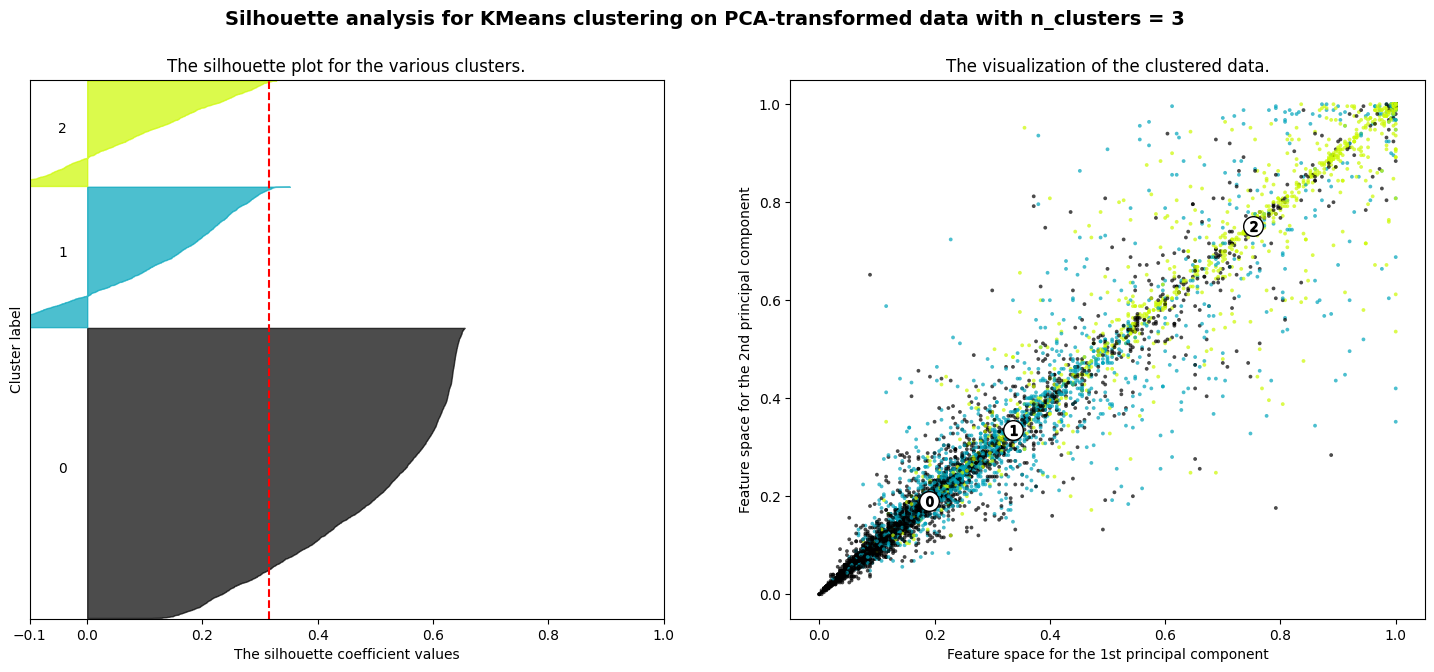

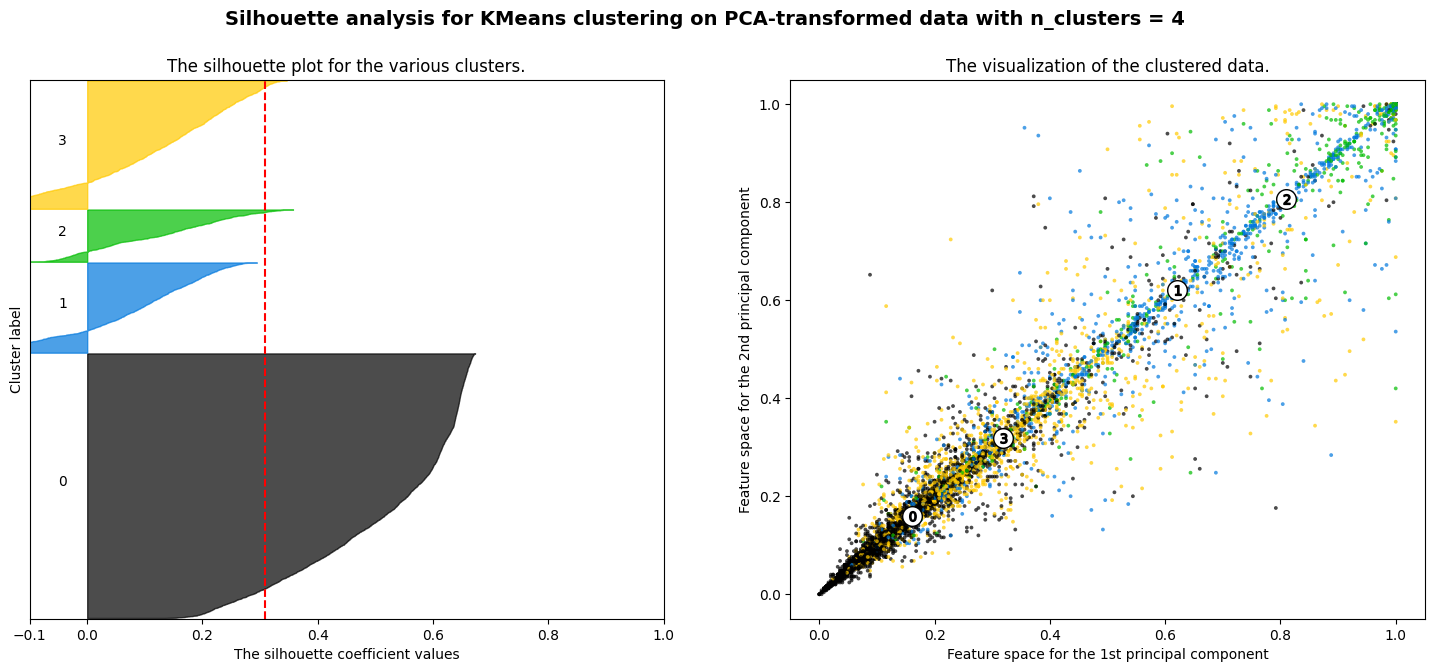

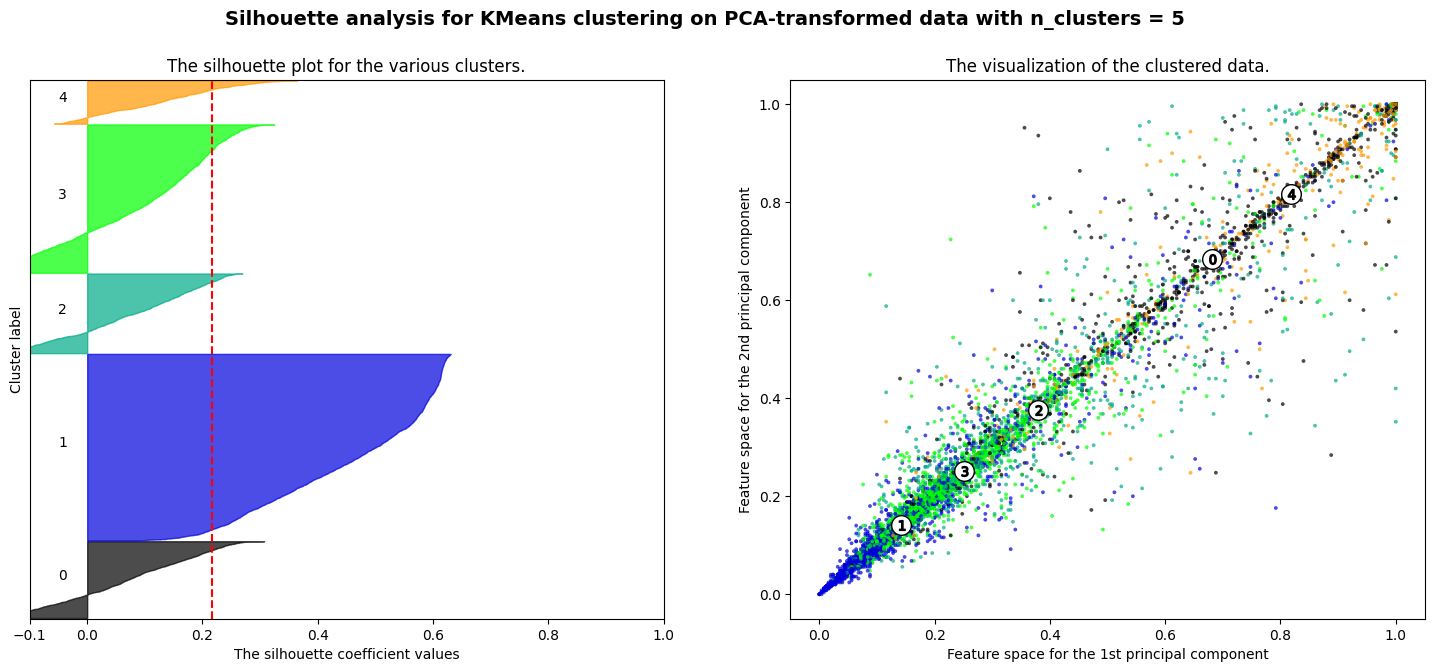

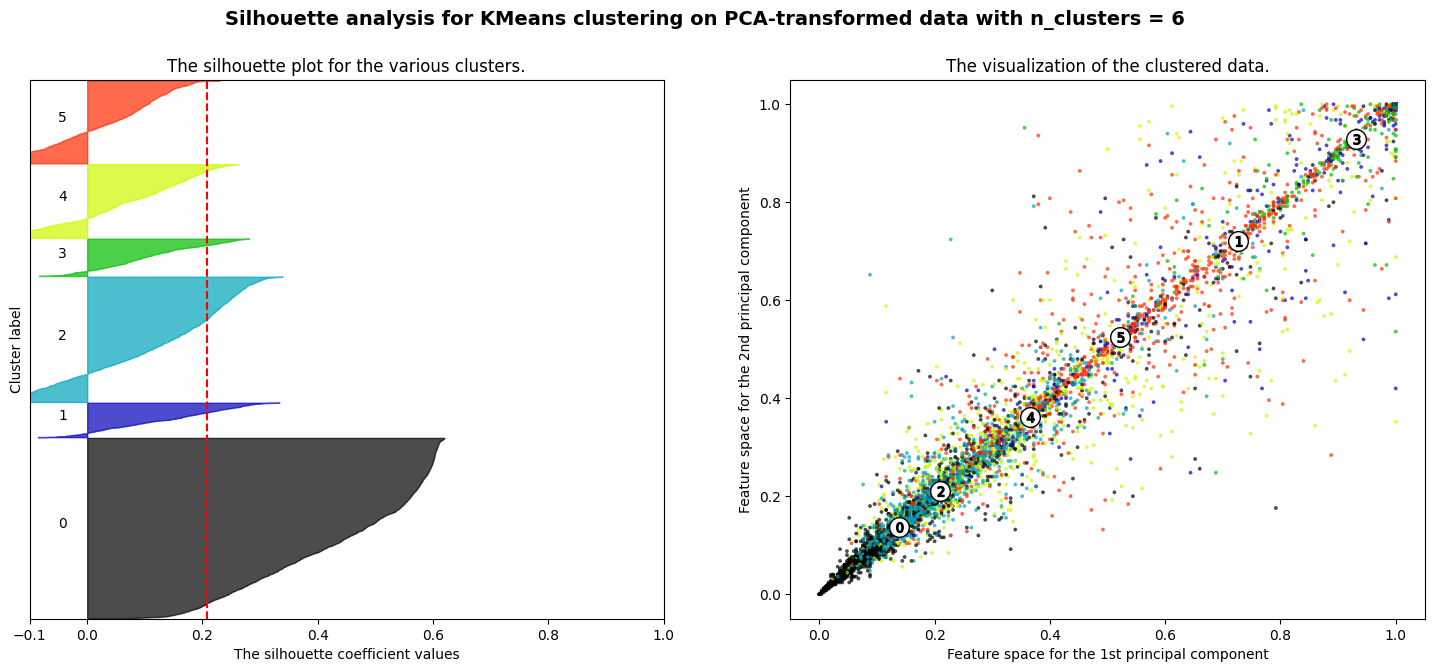

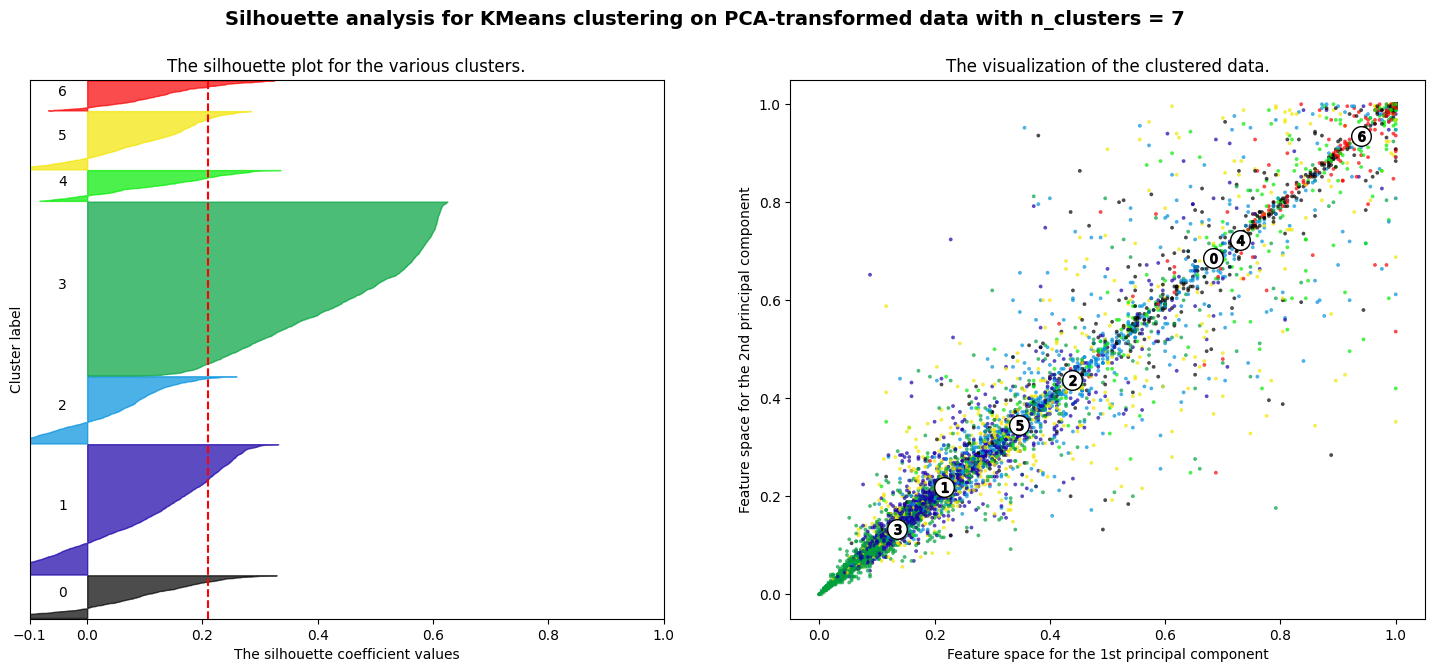

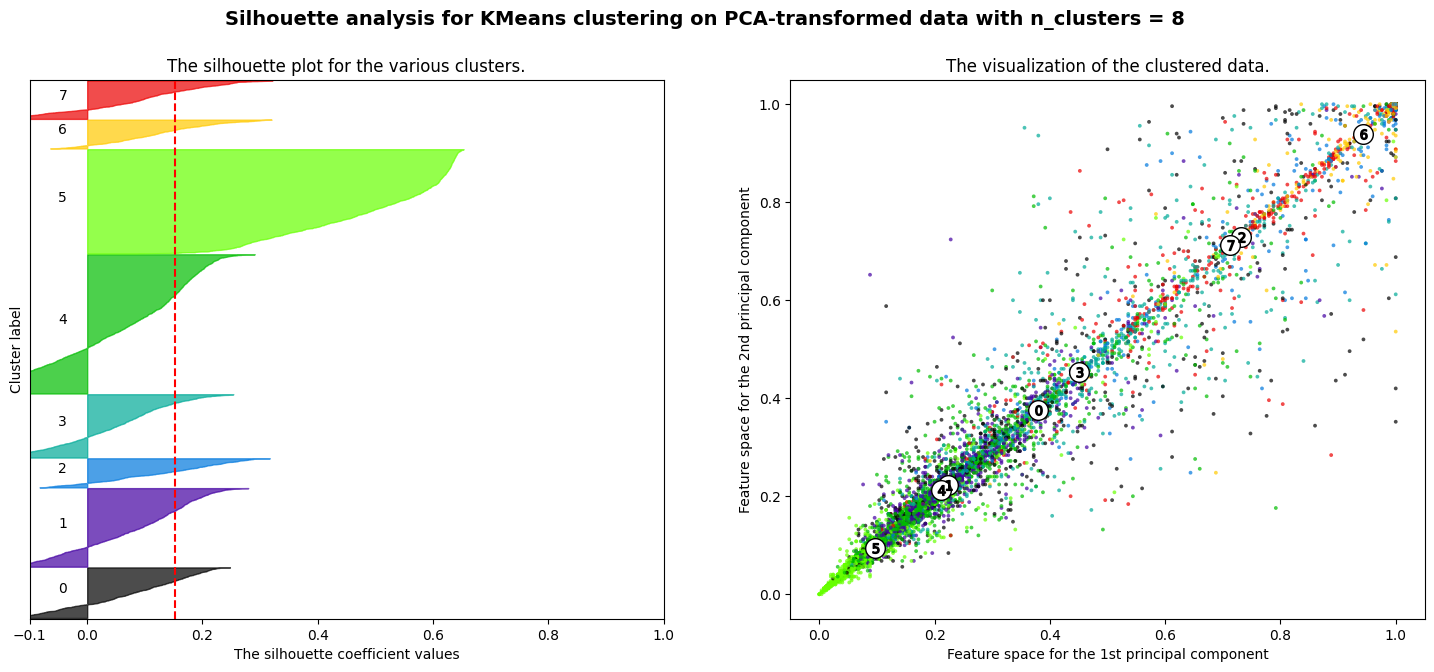

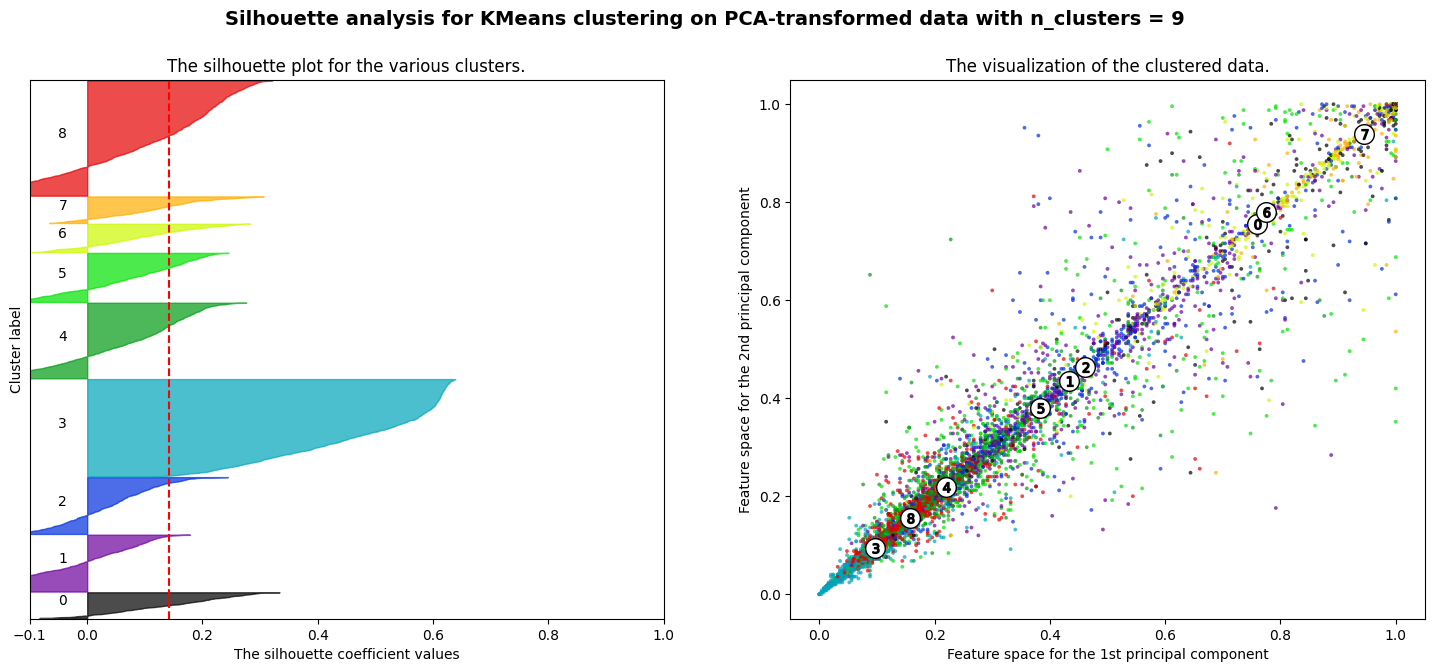

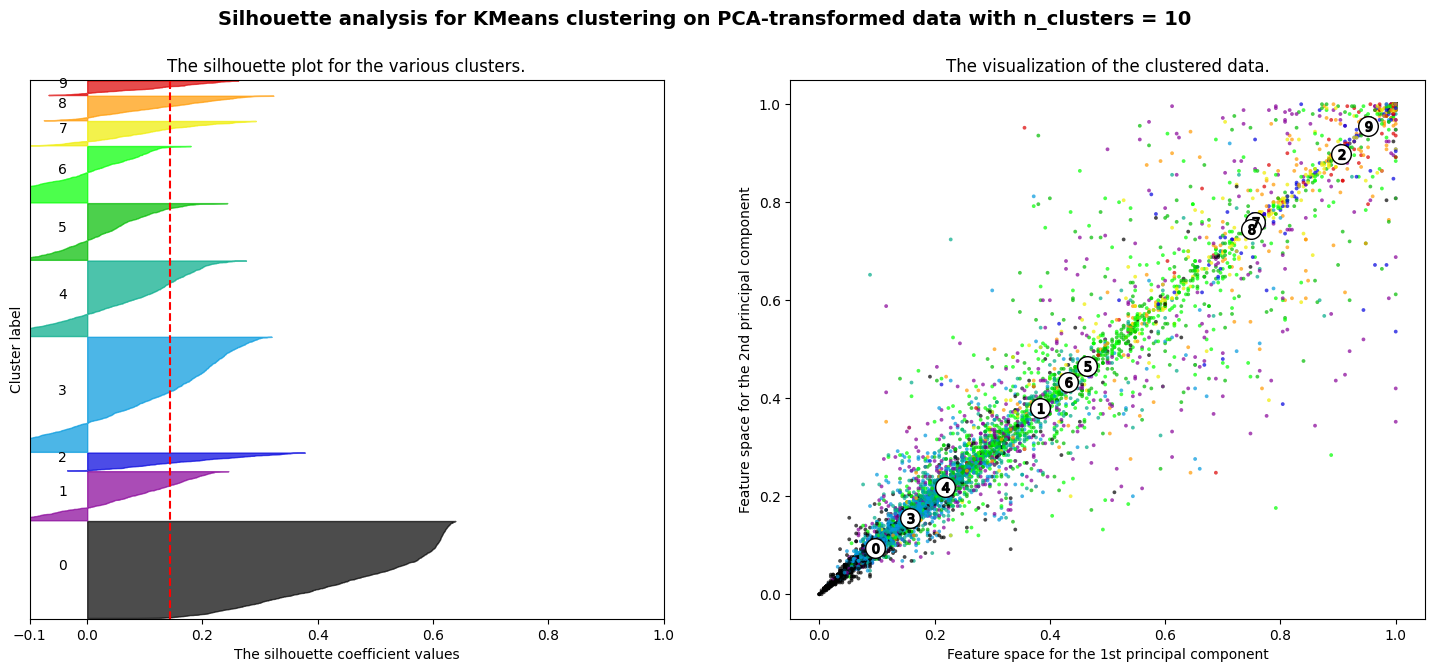

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a NumPy array
X = X_train_rf.to_numpy()
y = y_train.to_numpy().ravel()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on PCA-transformed data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()

### Implementation of different clustering algorithms for hard and soft clustering

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = X_train_rf.values

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, gmm_labels)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

# Print silhouette scores
print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'GMM Silhouette Score: {gmm_silhouette}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')

K-Means Silhouette Score: 0.35360167906159395
GMM Silhouette Score: 0.3409833006082573
Hierarchical Silhouette Score: 0.267787726411616


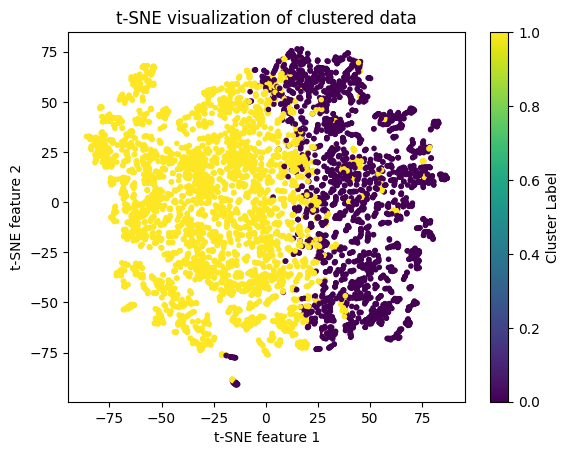

In [14]:
# Choosing the best n_clusters
gmm = GaussianMixture(n_components=2, random_state=42)
cluster_labels = gmm.fit_predict(X_train_rf)

# Perform t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_rf)

# Plot t-SNE
# plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='.')
plt.title('t-SNE visualization of clustered data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Now let's try to use 2 labels dataset to see if there are any differences

In [15]:
# Filter the training and test sets to only include classes 1 and 2
X_train_filtered = X_train_rf[(y_train["0"] == 1) | (y_train["0"] == 2)]
y_train_filtered = y_train[(y_train["0"] == 1) | (y_train["0"] == 2)]

X_test_filtered = X_test_rf[(y_test["0"] == 1) | (y_test["0"] == 2)]
y_test_filtered = y_test[(y_test["0"] == 1) | (y_test["0"] == 2)]

# Reset index
X_train_filtered.reset_index(drop=True, inplace=True)
y_train_filtered.reset_index(drop=True, inplace=True)
X_test_filtered.reset_index(drop=True, inplace=True)
y_test_filtered.reset_index(drop=True, inplace=True)

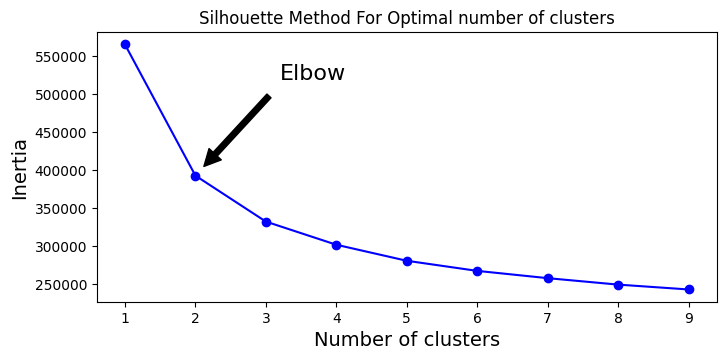

In [16]:
kmeans_per_k_2_labels = [KMeans(n_clusters=k, random_state=42).fit(X_train_filtered)
                for k in range(1, 10)]
                
inertias_2_labels = [model.inertia_ for model in kmeans_per_k_2_labels]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias_2_labels, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias_2_labels[1]),
             xytext=(0.35, 0.8),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Silhouette Method For Optimal number of clusters')
plt.show()

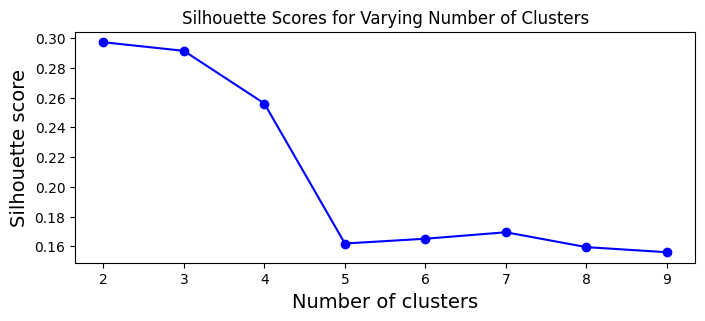

In [17]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for each k (excluding k = 1)
silhouette_scores_2_labels = [silhouette_score(X_train_filtered, model.labels_)
                              for model in kmeans_per_k_2_labels[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores_2_labels, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Scores for Varying Number of Clusters')
plt.show()


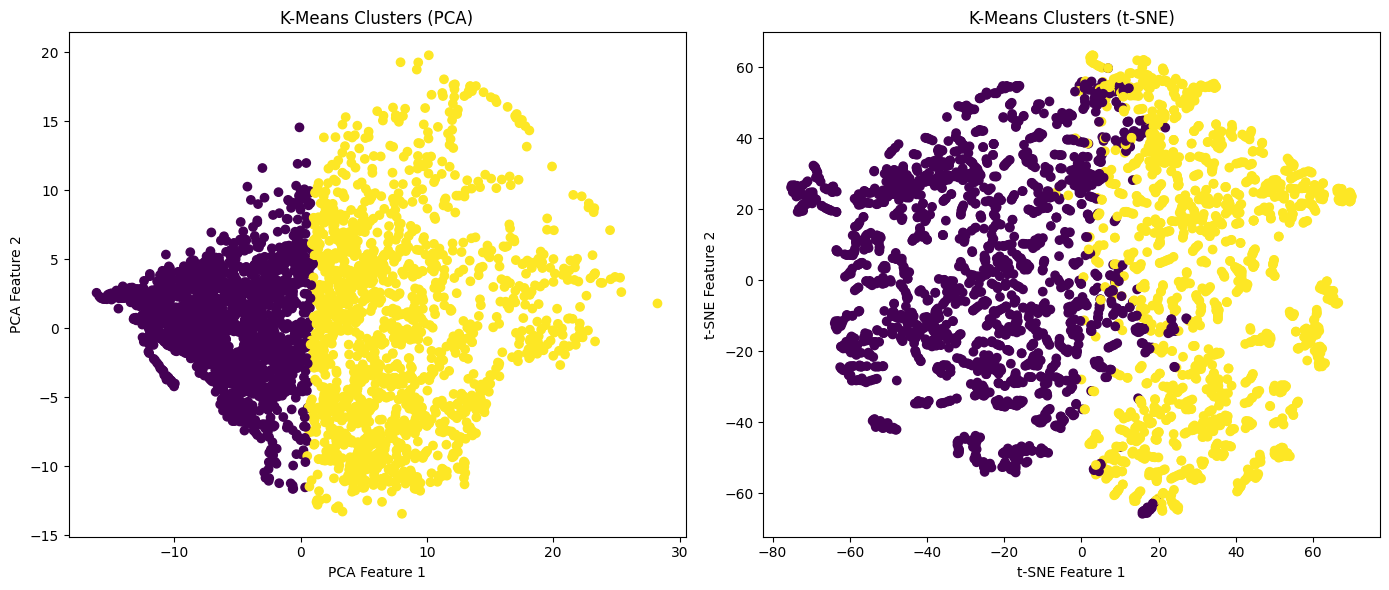

In [18]:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_filtered)

# Apply PCA 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_filtered)

# Apply t-SNE 
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_filtered)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA clusters
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].set_xlabel('PCA Feature 1')
axs[0].set_ylabel('PCA Feature 2')

# Plot t-SNE clusters
axs[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans.labels_)
axs[1].set_title('K-Means Clusters (t-SNE)')
axs[1].set_xlabel('t-SNE Feature 1')
axs[1].set_ylabel('t-SNE Feature 2')

# Display the plots
plt.tight_layout()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.29683444615109145
For n_clusters = 3, the average silhouette_score is : 0.2914408681859269
For n_clusters = 4, the average silhouette_score is : 0.2559901866318472
For n_clusters = 5, the average silhouette_score is : 0.1618333817563587
For n_clusters = 6, the average silhouette_score is : 0.1651412657599419
For n_clusters = 7, the average silhouette_score is : 0.1694633379582893
For n_clusters = 8, the average silhouette_score is : 0.1588572128306348
For n_clusters = 9, the average silhouette_score is : 0.15724961008236576
For n_clusters = 10, the average silhouette_score is : 0.12643083503404104


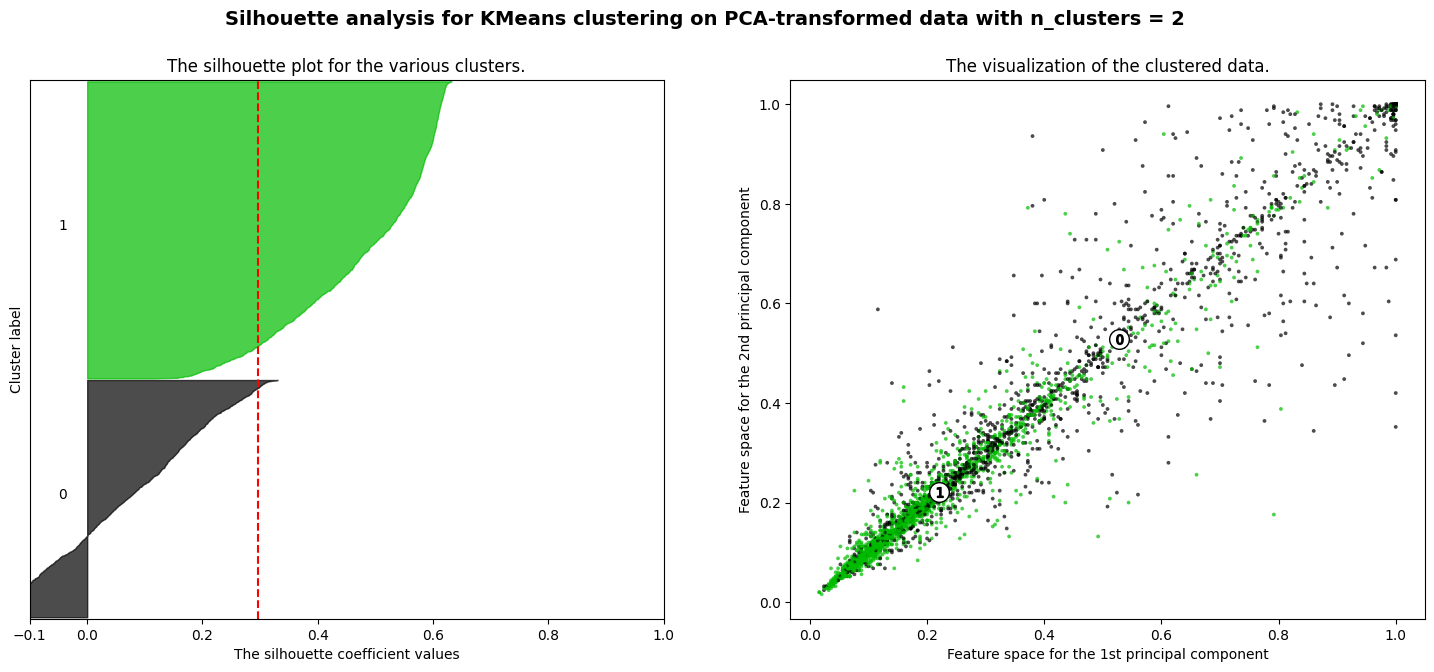

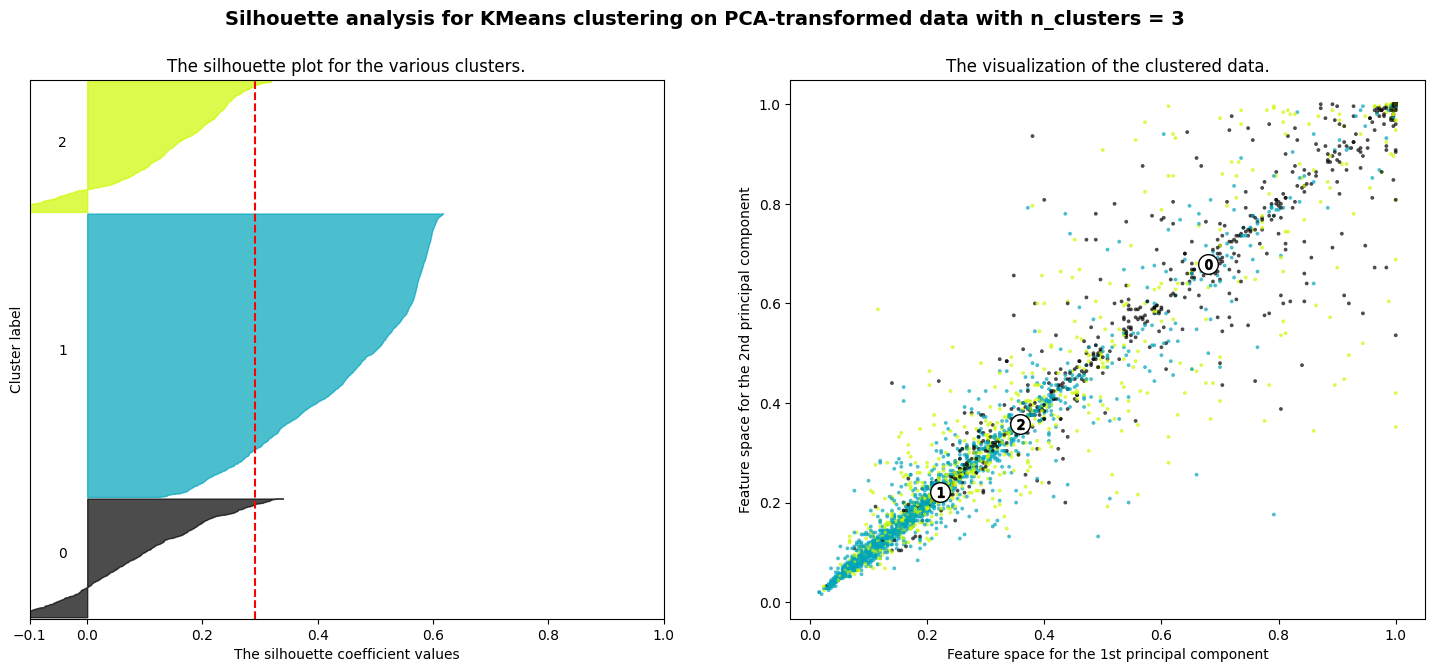

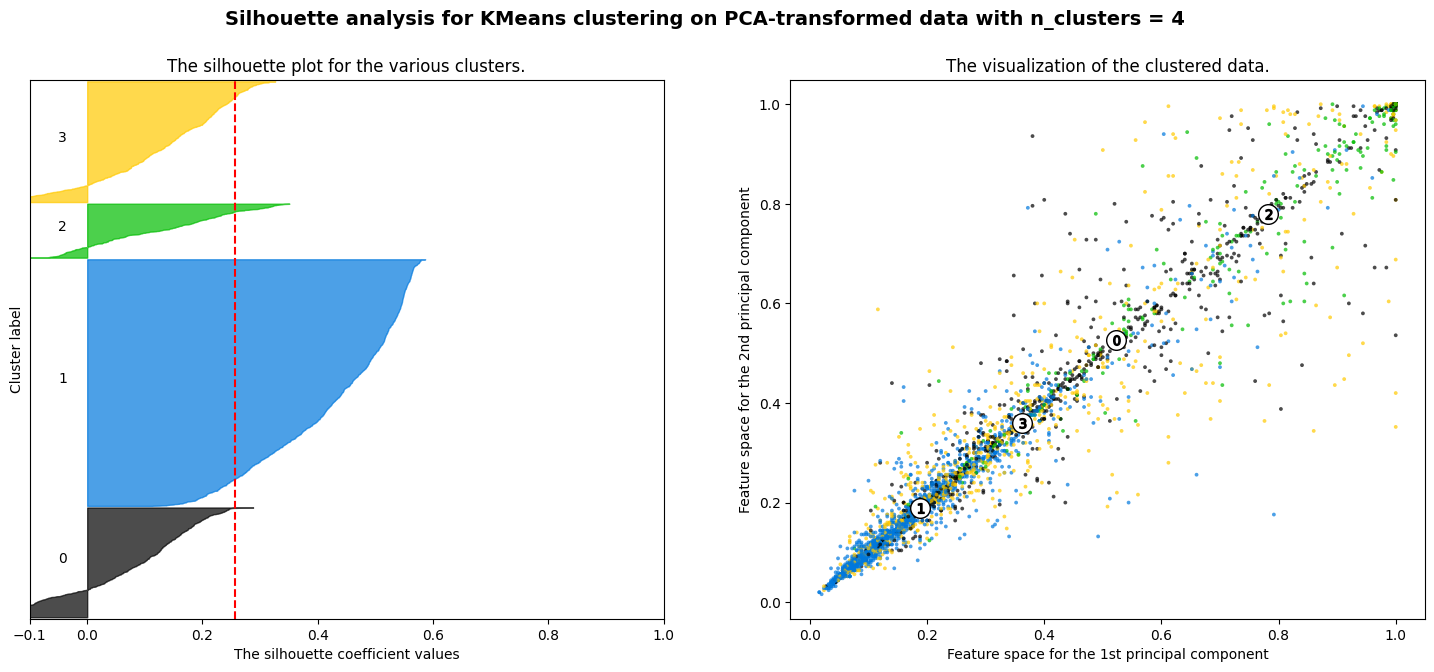

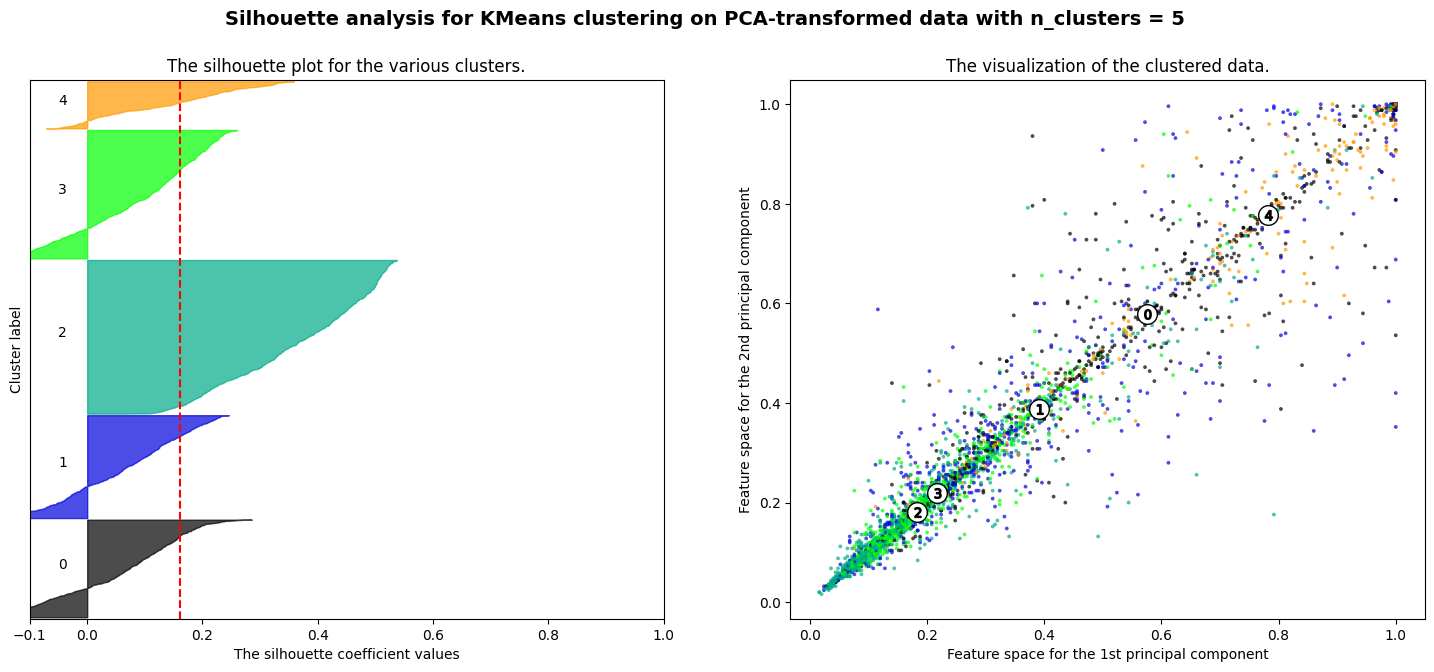

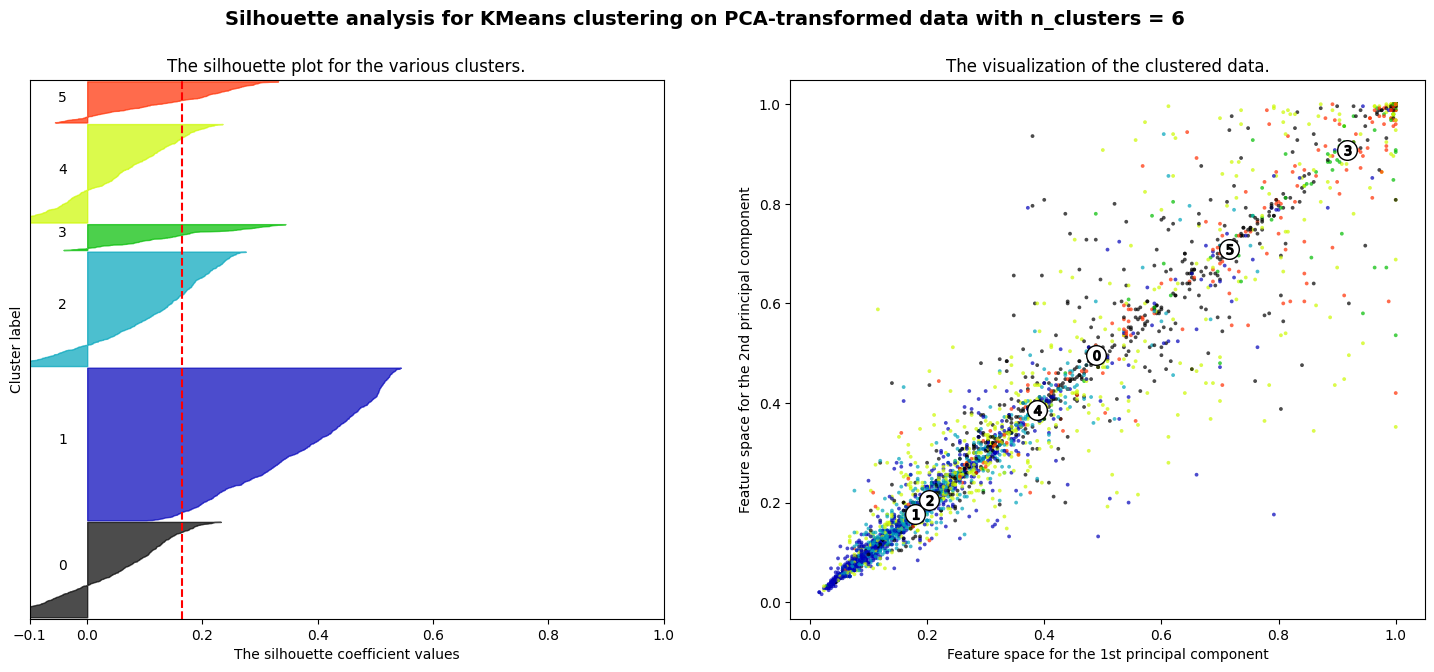

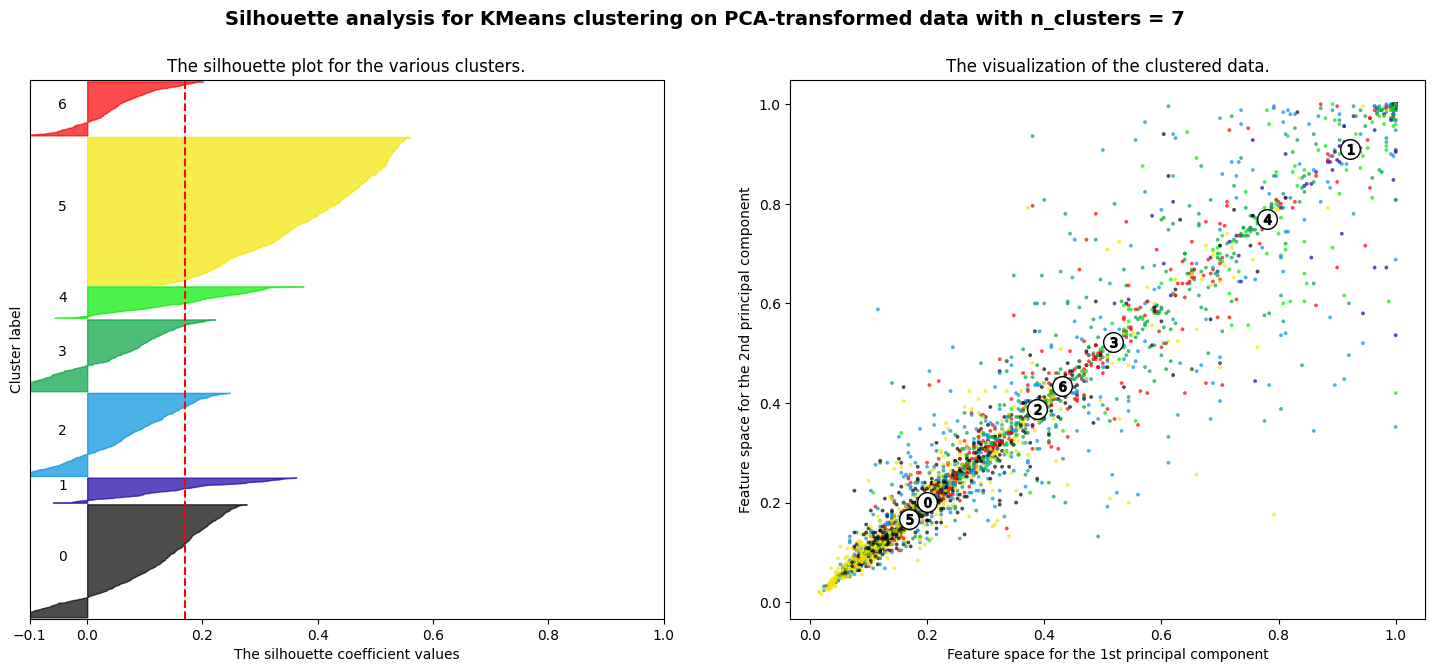

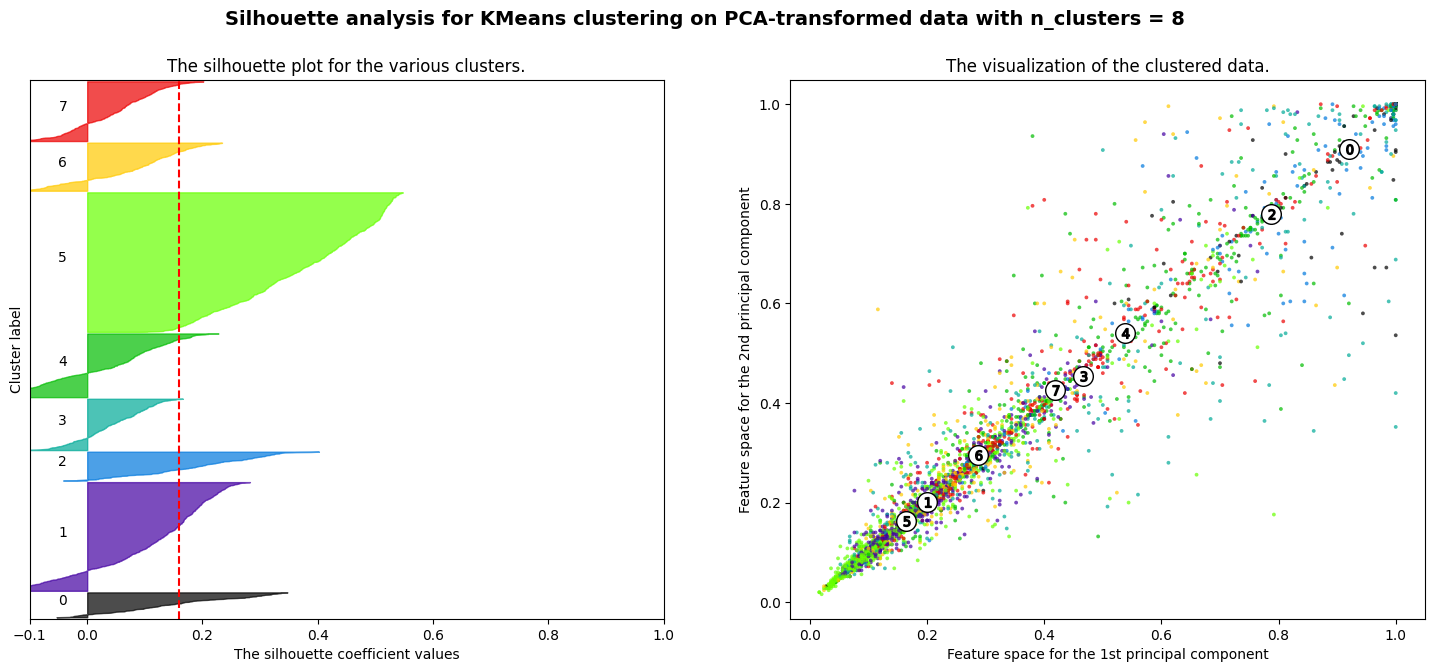

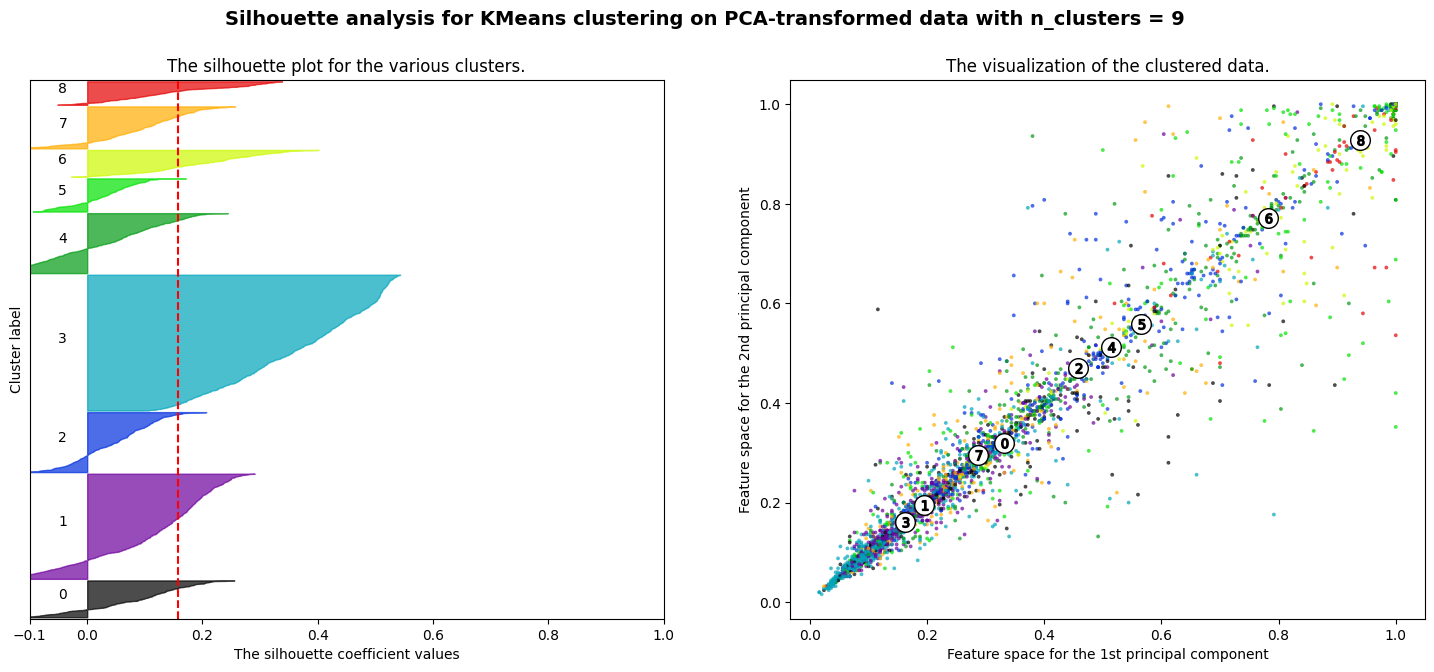

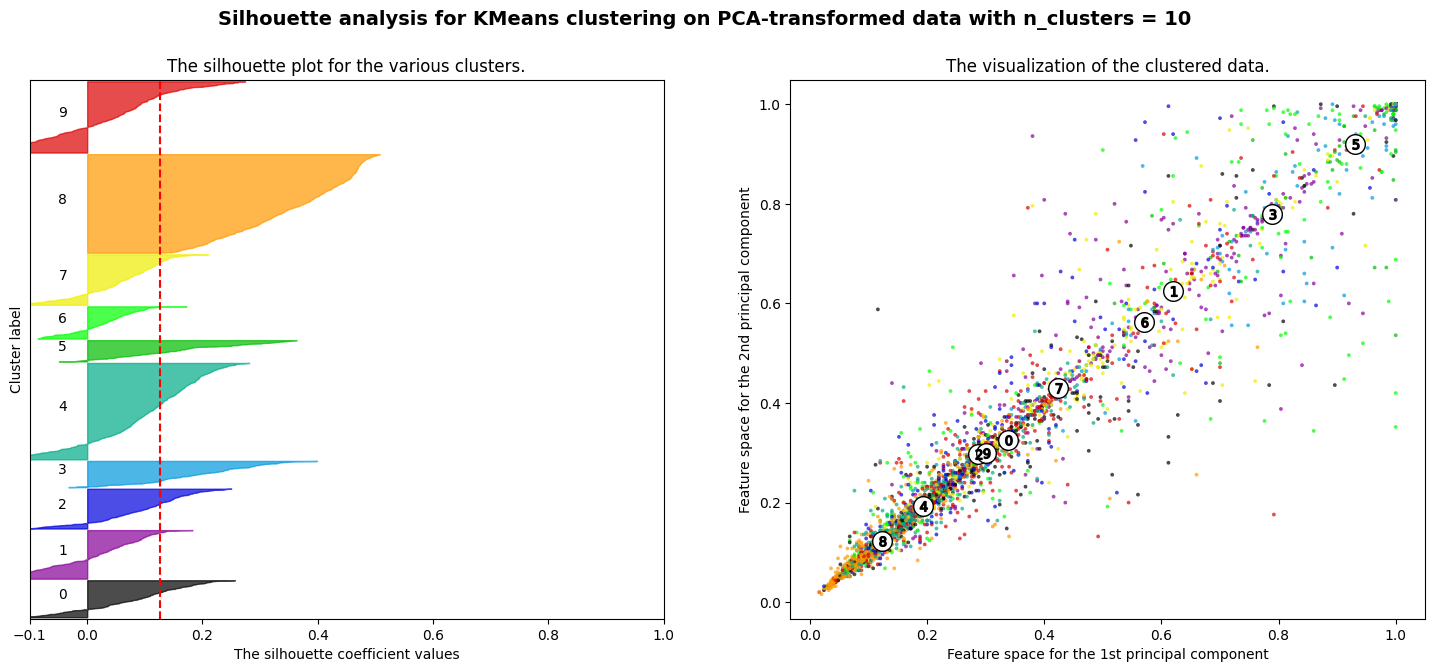

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a NumPy array
X = X_train_filtered.to_numpy()
y = y_train_filtered.to_numpy().ravel()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on PCA-transformed data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()

In [2]:
import pandas as pd

trainDataSet=pd.read_csv("/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv")
classDataSet=pd.read_csv("/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv")

In [3]:
from sklearn.preprocessing import StandardScaler

#Standarization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(trainDataSet)

/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


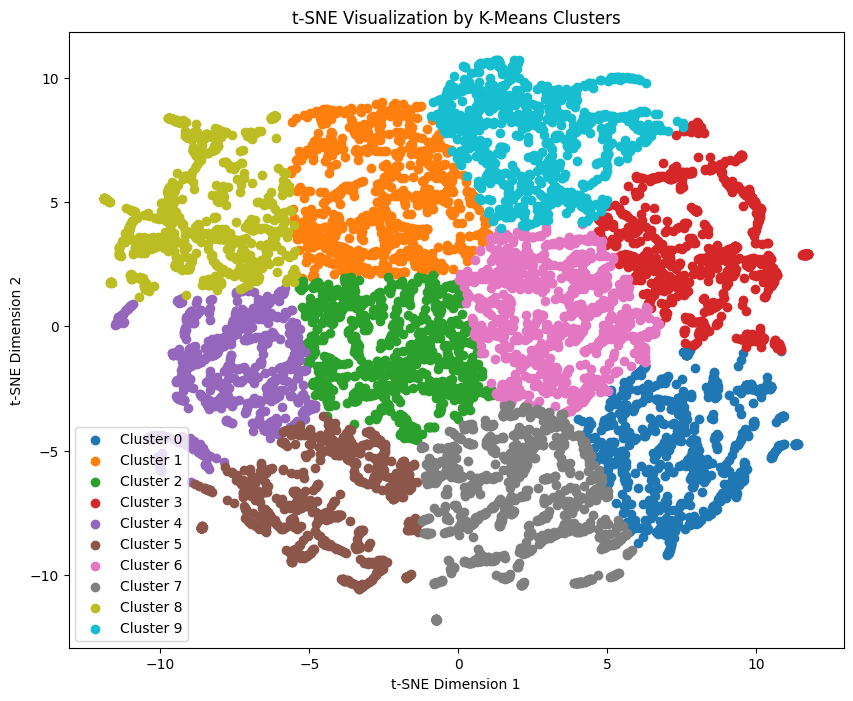

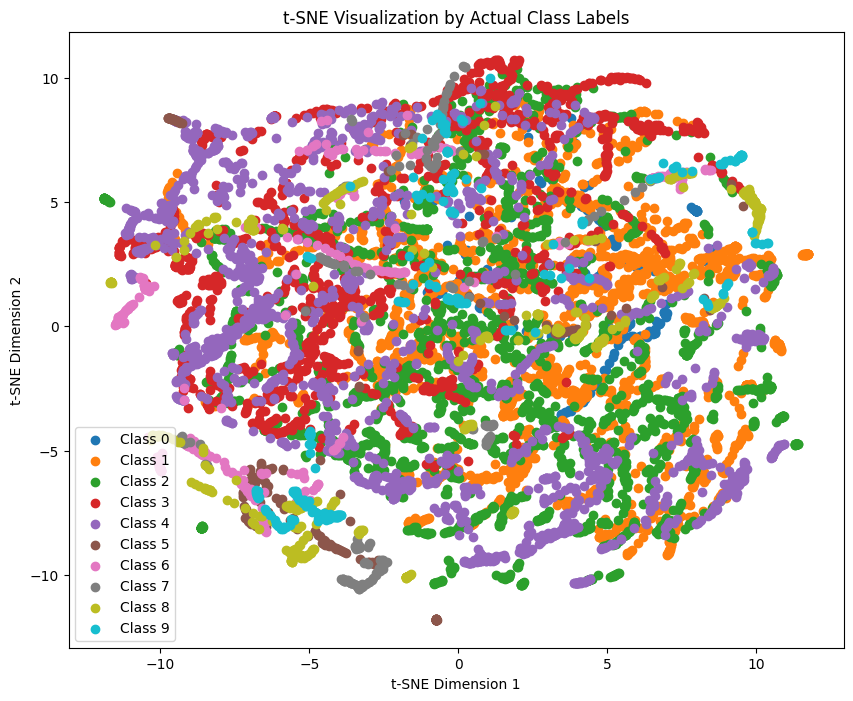

In [4]:

# Get unique class labels from classDataSet
unique_class_labels = classDataSet['0'].unique()

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Fit the t-SNE model to the standardized data
tsne_result = tsne.fit_transform(standardized_data)

# Perform k-means clustering and create a scatter plot based on clusters
num_clusters = 10  # You can adjust the number of clusters as needed

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_result)

# Create a scatter plot to visualize the t-SNE results based on k-means clusters
plt.figure(figsize=(10, 8))

# Loop through each cluster and plot points of that cluster with a different color
for cluster in range(num_clusters):
    cluster_indices = cluster_labels == cluster
    plt.scatter(tsne_result[cluster_indices, 0], tsne_result[cluster_indices, 1], label=f'Cluster {cluster}')

plt.title('t-SNE Visualization by K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Create a scatter plot to visualize the t-SNE results based on actual class labels
plt.figure(figsize=(10, 8))

# Loop through each class and plot points of that class with a different color
for class_label in unique_class_labels:
    class_indices = classDataSet['0'] == class_label
    plt.scatter(tsne_result[class_indices, 0], tsne_result[class_indices, 1], label=f'Class {class_label}')

plt.title('t-SNE Visualization by Actual Class Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()